In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import pandas as pd
import numpy as np
import gurobipy as gp
from gurobipy import *
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
### Importing Dataset

data = pd.read_csv('holidays_events.csv')

In [3]:
### Data Exploration

data.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [5]:
data.describe()

,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338


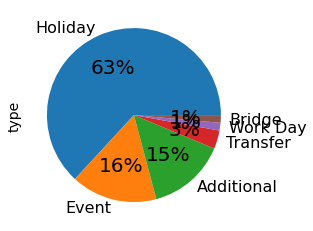

In [6]:
def pie_col(column):
  data[column].value_counts().plot.pie(autopct='%1.0f%%')

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 7
import matplotlib as mpl
mpl.rcParams['font.size'] = 20

pie_col('type')


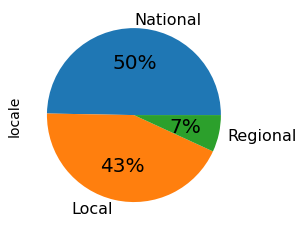

In [7]:
pie_col('locale')

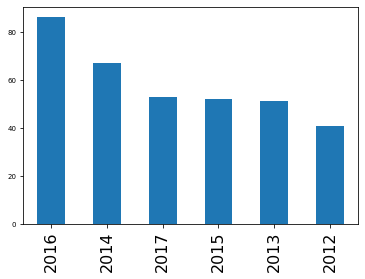

In [8]:
def plt_density(column,title=None):
  if title==None:
    title=column
  plt.figure(figsize = (15, 8))
  sns.distplot(data[column])
  plt.title(title)
  plt.show()
  return


years =  pd.to_datetime(data['date'], format='%Y-%m-%d', errors='coerce').dt.year
years.value_counts().plot.bar()

plt.rcParams['xtick.labelsize'] = 16

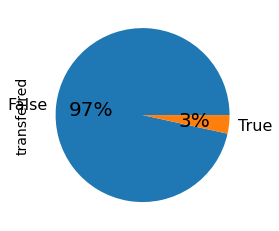

In [9]:
pie_col('transferred')

Text(0.5, 1.0, 'Locale Names')

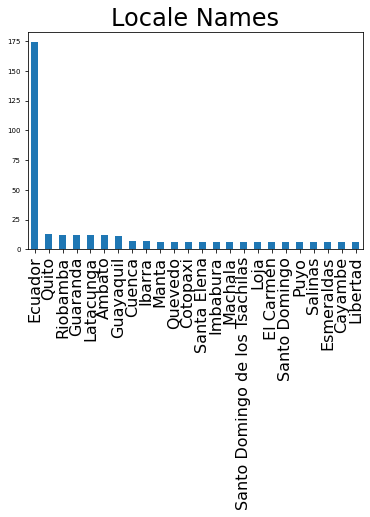

In [10]:
data.locale_name.value_counts().plot.bar()
plt.title('Locale Names')